In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import geopandas as gpd
from shapely.geometry import Point, Polygon, LineString
import h3

In [2]:
# edgelist
edf = pd.read_csv("../data/Gowalla_edges.txt", sep="\t")
edf.columns = ["user1", "user2"]

In [3]:
# check-in data
cdf = pd.read_csv("../data/Gowalla_totalCheckins.txt", sep="\t", header=None)
cdf.columns = ["user", "checkin_time", "lat", "lon", "location_id"]

In [4]:
cdf.shape

(6442892, 5)

In [23]:
# are location IDs unique?
print(cdf["location_id"].nunique())
print(cdf[["location_id", "lat", "lon"]].drop_duplicates().shape[0])
print("297 locations have 2 coordinate pairs")

1280969
1281266
297 locations have 2 coordinate pairs


107092  users


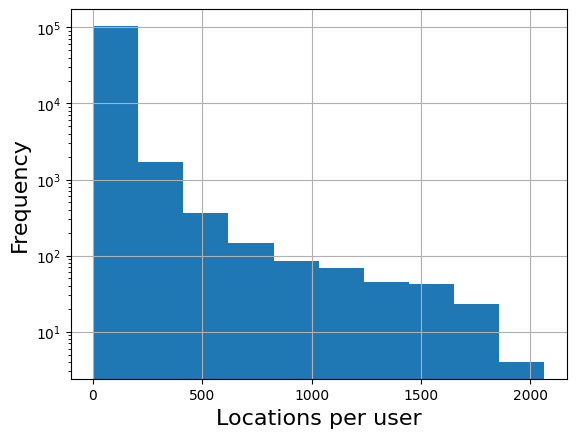

In [6]:
# check location per user
location_per_user = cdf\
    .groupby(["user"])["location_id"]\
    .agg("nunique")\
    .reset_index()\
    .rename(columns={"location_id":"nr_locations"})
print(location_per_user["user"].nunique(), " users")

plt.hist(location_per_user["nr_locations"])
plt.semilogy()
plt.xlabel("Locations per user", size=16)
plt.ylabel("Frequency", size=16)
plt.grid()

In [9]:
cdf["user"].nunique()

107092

In [43]:
location_per_user["nr_locations"].value_counts().head(20)

1     8916
2     6237
3     4929
4     4025
5     3409
6     2991
7     2795
8     2614
9     2467
10    2263
11    2199
12    2178
15    2166
13    2109
17    2057
14    2028
21    2022
20    2022
16    2021
22    1989
Name: nr_locations, dtype: int64

In [37]:
# point to h3 hex
def coords_to_point(lat, lon):
    geometry = [Point(xy) for xy in zip(lon, lat)]
    return geometry

def point_geometry_to_h3(geodf, geometry_col, h3_resolution):
    h3_col = geodf.apply(lambda r: h3.geo_to_h3(r[geometry_col].y, r[geometry_col].x, h3_resolution), axis=1)
    return h3_col


In [38]:
test_df["point_geom"] = coords_to_point(test_df["lat"], test_df["lon"])
test_df["h3"] = point_geometry_to_h3(test_df, geometry_col="point_geom", h3_resolution=10)

/var/folders/9d/8j37_fks51x11mk0_zwqsd940000gn/T/ipykernel_23534/2962958701.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["point_geom"] = coords_to_point(test_df["lat"], test_df["lon"])
/var/folders/9d/8j37_fks51x11mk0_zwqsd940000gn/T/ipykernel_23534/2962958701.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["h3"] = point_geometry_to_h3(test_df, geometry_col="point_geom", h3_resolution=10)


In [39]:
test_df

,user,checkin_time,lat,lon,location_id,point_geom,h3
0,0,2010-10-19T23:55:27Z,30.235909,-97.795140,22847,POINT (-97.7951395833 30.2359091167),8a489e363d6ffff
1,0,2010-10-18T22:17:43Z,30.269103,-97.749395,420315,POINT (-97.7493953705 30.2691029532),8a489e346217fff
2,0,2010-10-17T23:42:03Z,30.255731,-97.763386,316637,POINT (-97.7633857727 30.2557309927),8a489e344447fff
3,0,2010-10-17T19:26:05Z,30.263418,-97.757597,16516,POINT (-97.7575966669 30.2634181234),8a489e346a57fff
4,0,2010-10-16T18:50:42Z,30.274292,-97.740523,5535878,POINT (-97.7405226231 30.2742918584),8a489e3466cffff
5,0,2010-10-12T23:58:03Z,30.261599,-97.758581,15372,POINT (-97.7585805953 30.261599404),8a489e346b5ffff
6,0,2010-10-12T22:02:11Z,30.267910,-97.749312,21714,POINT (-97.7493124167 30.2679095833),8a489e34638ffff
7,0,2010-10-12T19:44:40Z,30.269103,-97.749395,420315,POINT (-97.7493953705 30.2691029532),8a489e346217fff
8,0,2010-10-12T15:57:20Z,30.281120,-97.745211,153505,POINT (-97.7452111244 30.2811204101),8a489e3428dffff
9,0,2010-10-12T15:19:03Z,30.269103,-97.749395,420315,POINT (-97.7493953705 30.2691029532),8a489e346217fff


In [25]:
test_df["geom2"] = coords_to_point(test_df["lat"], test_df["lon"])

/var/folders/9d/8j37_fks51x11mk0_zwqsd940000gn/T/ipykernel_23534/3445982099.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["geom2"] = coords_to_point(test_df["lat"], test_df["lon"])


In [26]:
test_df

,user,checkin_time,lat,lon,location_id,geometry,geom2
0,0,2010-10-19T23:55:27Z,30.235909,-97.795140,22847,POINT (-97.7951395833 30.2359091167),POINT (-97.7951395833 30.2359091167)
1,0,2010-10-18T22:17:43Z,30.269103,-97.749395,420315,POINT (-97.7493953705 30.2691029532),POINT (-97.7493953705 30.2691029532)
2,0,2010-10-17T23:42:03Z,30.255731,-97.763386,316637,POINT (-97.7633857727 30.2557309927),POINT (-97.7633857727 30.2557309927)
3,0,2010-10-17T19:26:05Z,30.263418,-97.757597,16516,POINT (-97.7575966669 30.2634181234),POINT (-97.7575966669 30.2634181234)
4,0,2010-10-16T18:50:42Z,30.274292,-97.740523,5535878,POINT (-97.7405226231 30.2742918584),POINT (-97.7405226231 30.2742918584)
5,0,2010-10-12T23:58:03Z,30.261599,-97.758581,15372,POINT (-97.7585805953 30.261599404),POINT (-97.7585805953 30.261599404)
6,0,2010-10-12T22:02:11Z,30.267910,-97.749312,21714,POINT (-97.7493124167 30.2679095833),POINT (-97.7493124167 30.2679095833)
7,0,2010-10-12T19:44:40Z,30.269103,-97.749395,420315,POINT (-97.7493953705 30.2691029532),POINT (-97.7493953705 30.2691029532)
8,0,2010-10-12T15:57:20Z,30.281120,-97.745211,153505,POINT (-97.7452111244 30.2811204101),POINT (-97.7452111244 30.2811204101)
9,0,2010-10-12T15:19:03Z,30.269103,-97.749395,420315,POINT (-97.7493953705 30.2691029532),POINT (-97.7493953705 30.2691029532)


In [22]:
coords_to_point(test_df, lat_col="lat", lon_col="lon")

/var/folders/9d/8j37_fks51x11mk0_zwqsd940000gn/T/ipykernel_23534/1956120271.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["geometry"] = [Point(xy) for xy in zip(df[lon_col], df[lat_col])]


,user,checkin_time,lat,lon,location_id,geometry
0,0,2010-10-19T23:55:27Z,30.235909,-97.795140,22847,POINT (-97.7951395833 30.2359091167)
1,0,2010-10-18T22:17:43Z,30.269103,-97.749395,420315,POINT (-97.7493953705 30.2691029532)
2,0,2010-10-17T23:42:03Z,30.255731,-97.763386,316637,POINT (-97.7633857727 30.2557309927)
3,0,2010-10-17T19:26:05Z,30.263418,-97.757597,16516,POINT (-97.7575966669 30.2634181234)
4,0,2010-10-16T18:50:42Z,30.274292,-97.740523,5535878,POINT (-97.7405226231 30.2742918584)
5,0,2010-10-12T23:58:03Z,30.261599,-97.758581,15372,POINT (-97.7585805953 30.261599404)
6,0,2010-10-12T22:02:11Z,30.267910,-97.749312,21714,POINT (-97.7493124167 30.2679095833)
7,0,2010-10-12T19:44:40Z,30.269103,-97.749395,420315,POINT (-97.7493953705 30.2691029532)
8,0,2010-10-12T15:57:20Z,30.281120,-97.745211,153505,POINT (-97.7452111244 30.2811204101)
9,0,2010-10-12T15:19:03Z,30.269103,-97.749395,420315,POINT (-97.7493953705 30.2691029532)
